In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
q4x = pd.read_csv('../data/q4/q4x.dat', sep='\s+', header=None).to_numpy()
q4y = pd.read_csv('../data/q4/q4y.dat', sep='\s+', header=None).to_numpy()
# q4x = np.array([np.array(sublist) for sublist in q4x])
# q4y = np.array([np.array(sublist) for sublist in q4y])

In [87]:
logisticX = q4x
logisticY = np.array([np.array([1]) if y == 'Alaska' else np.array([0]) for y in q4y])

In [88]:
def normalize(X):
    mean = np.mean(X, axis=0)
    stdev = np.std(X, axis=0)
    X = (X-mean)/stdev
    return (X, mean, stdev)

In [89]:
(normX, meanX, stdevX) = normalize(logisticX)
X = normX
Y = logisticY

In [90]:
X0 = X[Y[:, 0] == 0]
X1 = X[Y[:, 0] == 1]
print(logisticX.shape)
print(np.mean(X, axis = 0))
print(np.mean(X0, axis = 0))
print(np.mean(X1, axis = 0))


(100, 2)
[-5.55111512e-17  2.99760217e-16]
[ 0.75529433 -0.68509431]
[-0.75529433  0.68509431]


In [105]:
# Linear Gaussian Discrimant Analysis for 2 classes
def LDA_Linear(X0, X1, Y):
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)
    cov = np.zeros((X0.shape[1], X0.shape[1]))
    for x0 in X0:
        cov = cov + (np.array([x0-mu0]).T)@(np.array([x0-mu0]))
    for x1 in X1: 
        cov = cov + (np.array([x1-mu1]).T)@(np.array([x1-mu1]))
    cov = cov/len(Y)
    return (mu0, mu1, cov)

In [107]:
(mu0l, mu1l, covl) = LDA_Linear(X0, X1, Y)

(array([ 0.75529433, -0.68509431]),
 array([-0.75529433,  0.68509431]),
 array([[ 0.42953048, -0.02247228],
        [-0.02247228,  0.53064579]]))

In [93]:
# Quadratic Gaussian Discrimant Analysis for 2 classes
def LDA_Quadratic(X0, X1, Y):
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)
    cov0 = np.zeros((X0.shape[1], X0.shape[1]))
    cov1 = np.zeros((X1.shape[1], X1.shape[1]))
    for x0 in X0:
        cov0 = cov0 + (np.array([x0-mu0]).T)@(np.array([x0-mu0]))
    for x1 in X1: 
        cov1 = cov1 + (np.array([x1-mu1]).T)@(np.array([x1-mu1]))
    cov0 = cov0/len(X0)
    cov1 = cov1/len(X1)
    return (mu0, mu1, cov0, cov1)

In [94]:
(mu0, mu1, cov0, cov1) = LDA_Quadratic(X0, X1, Y)
mu0, mu1, cov0, cov1

(array([ 0.75529433, -0.68509431]),
 array([-0.75529433,  0.68509431]),
 array([[0.47747117, 0.1099206 ],
        [0.1099206 , 0.41355441]]),
 array([[ 0.38158978, -0.15486516],
        [-0.15486516,  0.64773717]]))

In [ ]:
# Decision boundary plot for LDA Linear
fig = plt.figure()
plt.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='r', marker='o')
plt.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='b', marker='^')
x_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_pred = theta_new[0] + theta_new[1]*x_range
plt.contour()
plt.show()

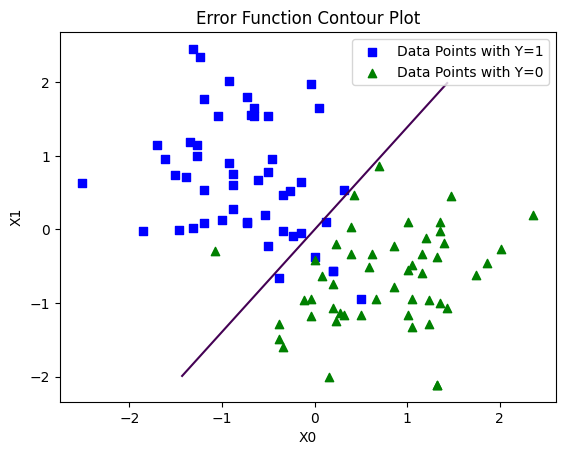

In [110]:
# # Create a mesh grid for the parameter space
cov0inv = np.linalg.inv(cov0)
cov1inv = np.linalg.inv(cov1)
covlinv = np.linalg.inv(covl)
x0_vals = np.linspace(-2, 2, 100)  # Adjust the range as needed for x0
x1_vals = np.linspace(-2, 2, 100)  # Adjust the range as needed for x1
x0_vals, x1_vals = np.meshgrid(x0_vals, x1_vals)

# Calculate the error values for each parameter combination
z_vals_lin = np.zeros_like(x0_vals)
z_vals_quad = np.zeros_like(x0_vals)
for i in range(len(x0_vals)):
    for j in range(len(x0_vals[i])):
        # Calculate error using the current parameters
        current_x0 = x0_vals[i, j]
        current_x1 = x1_vals[i, j]
        x = np.array([current_x0, current_x1])
        z_vals_lin[i, j] = 2*((x.T)@(covlinv)@(mu0) - (x.T)@(covlinv)@(mu1)) + (mu1.T)@(covlinv)@(mu1) - (mu0.T)@(covlinv)@(mu0)
        z_vals_quad[i, j] = (x.T)@(cov1inv - cov0inv)@x + 2*((x.T)@(cov0inv)@(mu0) - (x.T)@(cov1inv)@(mu1)) + (mu1.T)@(cov1inv)@(mu1) - (mu0.T)@(cov0inv)@(mu0)

# Create a contour plot of the z function
# plt.contour(x0_vals, x1_vals, z_vals_quad, levels=[0], cmap='viridis')
plt.contour(x0_vals, x1_vals, z_vals_lin, levels=[0], cmap='viridis')

plt.scatter(X1[:, 0], X1[:, 1], marker='s', color='blue', label='Data Points with Y=1')
plt.scatter(X0[:, 0], X0[:, 1], marker='^', color='green', label='Data Points with Y=0')

plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Error Function Contour Plot')
# plt.colorbar()  # Add a colorbar to the plot
plt.legend()
plt.show()